In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]
from turing.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2]:
log_reg.coef_

array([[ 2.01236322, -3.34125767]])

In [3]:
log_reg.intercept_

array([-0.58318995])

对于看逻辑回归，依然有这些个参数，也就是所谓的决策边界

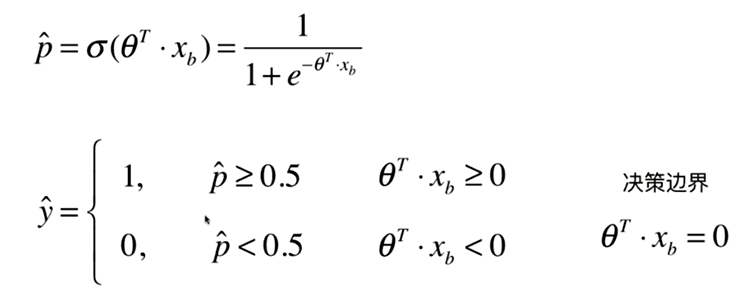
大于零分为一类，小于零分为一类

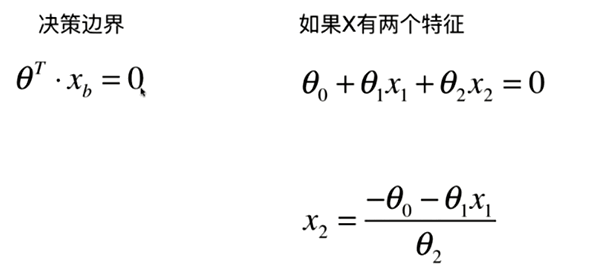

In [4]:
def x2(x1):
    return (-log_reg.coef_[0][0] * x1 - log_reg.intercept_) / log_reg.coef_[0][1]

In [5]:
x1_plot = np.linspace(4, 8, 1000)  # 均匀的取值
x2_plot = x2(x1_plot)

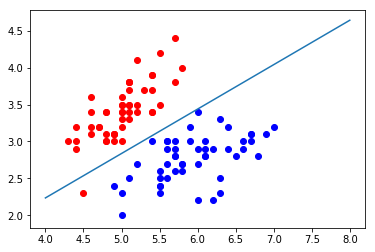

In [6]:
plt.plot(x1_plot, x2_plot)
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")

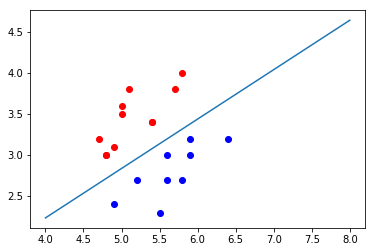

In [7]:
plt.plot(x1_plot, x2_plot)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="red")
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="blue")

### 不规则的决策边界的绘制方法

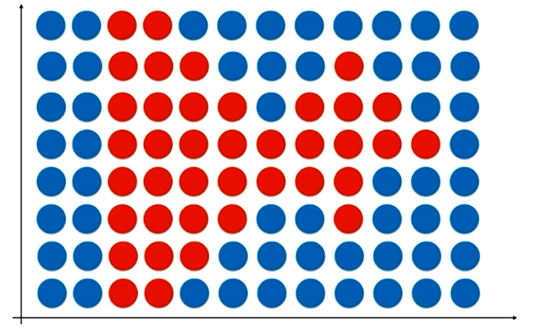

In [8]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF69D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


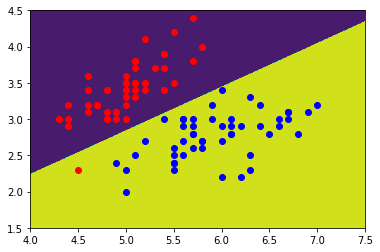

In [9]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")

### KNN的决策边界

首先训练一个分类器

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn_clf.score(X_test, y_test)

1.0

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


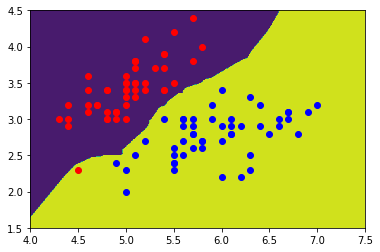

In [12]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")

knn作用域三个变量的上的样子

In [13]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


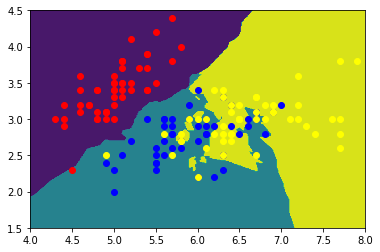

In [14]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1], color="red")
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1], color="blue")
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1], color="yellow")

可视化的结果就是看到这个分类很不规则,尝试传入n_neighbors大一些，因为越小越复杂

In [15]:
knn_clf_all_ = KNeighborsClassifier(n_neighbors=50)
knn_clf_all_.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


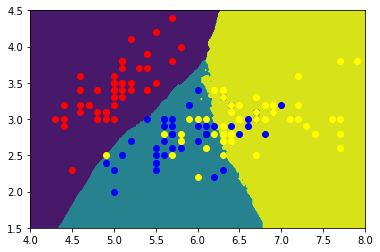

In [16]:
plot_decision_boundary(knn_clf_all_, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1], color="red")
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1], color="blue")
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1], color="yellow")

说明n_neighbors越大，分块月规整，越明显